# Absorption of a nanotube with antennae

This notebook will calculate the dispersion relation of a nanotube with 60 nm outer and 40 nm inner diameters, permalloy material parameters. The obtained dispersion(s) must be equivalent to that(those) calculated analytically as well as with micromagnetic simulations published in: ```Jorge A. Otálora, Ming Yan, Helmut Schultheiss, Riccardo Hertel, and Attila Kákay, Phys. Rev. Lett. 117, 227203 (2016).```

First, we repeat the steps from the example on the dispersion simulation of nanotubes in vortex state. Then we set an antenna and compute the absorption.

In [1]:
import tetrax as tx

%matplotlib notebook
import matplotlib.pyplot as plt

In [2]:
sample = tx.create_sample(name="Nanotube_20nm_30nm")
sample.Msat = 800e3
sample.Aex = 13e-12

mesh = tx.geometries.tube_cross_section(20,30,lc=3)
sample.set_geom(mesh)

This sample does not have a mesh yet. You cannot set spatially dependent saturation for it.
This sample does not have a mesh yet. You cannot set spatially dependent exchange stiffness for it.
Setting geometry and calculating discretized differential operators on mesh.
Done.


In [3]:
sample.mag = tx.vectorfields.helical(sample.xyz, 60, 1)
exp = tx.create_experimental_setup(sample)
Bphi = tx.vectorfields.helical(sample.xyz, 90, 1) * 0.08
exp.Bext =  Bphi
exp.relax(tol=1e-13,continue_with_least_squares=True)

Minimizing in using 'L-BFGS-B' (tolerance 1e-13) ...
Current energy length density: -1.051136253904384e-22 J/m  mx = 0.00  my = -0.01  mz = -0.00
Success!



True

In [4]:
dispersion = exp.eigenmodes(num_cpus=-1,num_modes=5,kmin=-40e6,kmax=40e6,Nk=81)

100%|█████████████████████████████| 81/81 [00:15<00:00,  5.23it/s]


### Absorption computation

#### Current loop antenna

Here we show how to compute the dispersion one would measure when exciting with a given antenna type. First let's choose a current loop antenna and as a second example a couplanar antenna (CPW). We will visualize the antenna relative to the sample cross section.
The first antenna is a current loop with a given ```radius``` and ```width```.

In [5]:
radius = 40
width = 5
exp.antenna = tx.core.experimental_setup.CurrentLoopAntenna(width,radius)
exp.show()

/Users/attilak/anaconda3/lib/python3.10/site-packages/traittypes/traittypes.py:97: UserWarning: Given trait value dtype "float32" does not match required type "float32". A coerced copy has been created.
  warnings.warn(


Plot(antialias=3, axes=['x', 'y', 'z'], axes_helper=1.0, axes_helper_colors=[16711680, 65280, 255], background…

![](current_loop_nanotube_antenna.png)

Compute the dispersion one can excite with the current loop antenna:

In [6]:
absorb, wavevectors, frequencies = exp.absorption()

Calculating absorption.
Done.


Let's plot it:

In [7]:
plt.figure()
plt.pcolormesh(wavevectors*1e-6, frequencies, absorb)
plt.xlabel("Wave vector (rad/µm)")
plt.ylabel("Frequency (GHz)")
plt.show()

<IPython.core.display.Javascript object>

### Couplanar-wave antenna

#### NOTE: no need to recompute the dispersion itself, only the absorption is recalculated based on the new antenna geometry.

The second antenna is a CPW:

In [8]:
exp.antenna = tx.core.experimental_setup.CPWAntenna(20,58,35)
exp.show()

Plot(antialias=3, axes=['x', 'y', 'z'], axes_helper=1.0, axes_helper_colors=[16711680, 65280, 255], background…

![CPW Antenna](CPW_nanotube.png)

Compute and plot the absorption:

Calculating absorption.
Done.


<IPython.core.display.Javascript object>


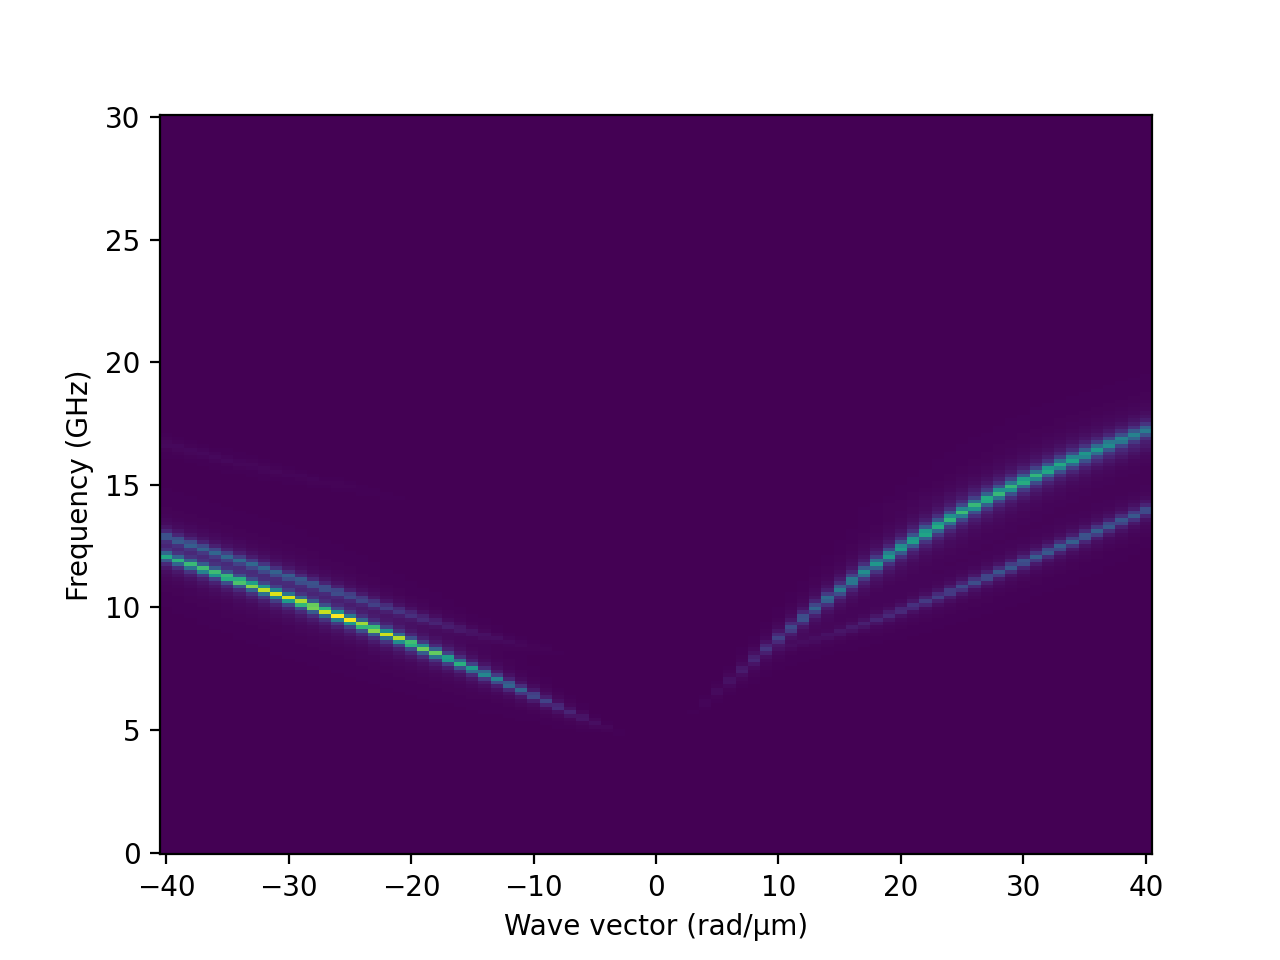

In [9]:
absorb, wavevectors, frequencies = exp.absorption()
plt.figure()
plt.pcolormesh(wavevectors*1e-6, frequencies, absorb)
plt.xlabel("Wave vector (rad/µm)")
plt.ylabel("Frequency (GHz)")
plt.show()